In [2]:
using DataFrames
using CSV
using Plots


┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342


In [2]:
"""
 Converts a given index to a 2D Matrix Index with the given Matrix size
"""
function getValue(index, xmin, xmax, xlen, ymin, ymax, ylen)
    xstep = (xmax-xmin)/xlen
    ystep = (ymax-ymin)/ylen


    x = (index%xlen) * xstep + xmin
    y = trunc(Int64, index/ylen) * ystep + ymin
    return x,y
end
xs = Vector()

ys = Vector()
for i in 1:nrow(df)
    x, y = getValue(i-1, 3, 10, 40, 0, 2, 60)
    push!(xs, x)
    push!(ys, y)
end


LoadError: UndefVarError: df not defined

In [19]:
xname = "frequency"
yname = "earliest_pickup"

#df = DataFrame(CSV.File("results_latest_dropoff.csv"))
yname = "earliest_pickup"
#path = "/project.dcf/poss/datasets/planned_pickup/logscale_earliest_pickupresults.csv"
path = "./Data/earliest_pickup_testing_phase.csv"
path = "./results.csv"
df = DataFrame(CSV.File(path))#"earliest_pickup_try2.csv"))



#sort!(df, [order(xname), order(yname)])
xs = df[!, xname]
ys = df[!, yname]
#xs = unique(xs)
#ys = unique(ys)

#print(df)
ks = names(df)
filter!(e->e∉[xname, yname, "occupancy"],ks)
print(ks)
gr()

["driven_distance", "efficiency", "mean_relative_delay", "mean_relative_waiting_time", "requested_distance", "served_percentage", "served_percentage_no_waiting"]

Plots.GRBackend()

In [24]:
#To Visualize processes, that are not yet finished
for name in ks
    data = Float64.(df[!, name])
    #println("$(maximum(df[!, xname])), $(maximum(df[!, yname])), $(size(df[!, name]))")
    p = scatter(xs, ys,
            marker_z= data, #attr(cmin=minimum(data), cmax=maximum(data), color=data, colorscale="Bluered")
            marker = (:rect, 8),
            xlabel="$xname [1/t₀]", ylabel="$yname [t₀]",
     title="$name")
    #xticks= (log.(exp(0.1):7:exp(maximum(xs))),["$i" for i in log.(exp(0.5):5:exp(maximum(xs)))]),
    #yticks= (log.(exp(0.5):5:exp(maximum(ys))),["$i" for i in log.(exp(0.5):5:exp(maximum(ys)))]))
    xaxis!(:log)
    yaxis!(:log)
    display(p)
end



LoadError: syntax: "for" at In[24]:2 expected "end", got ")"

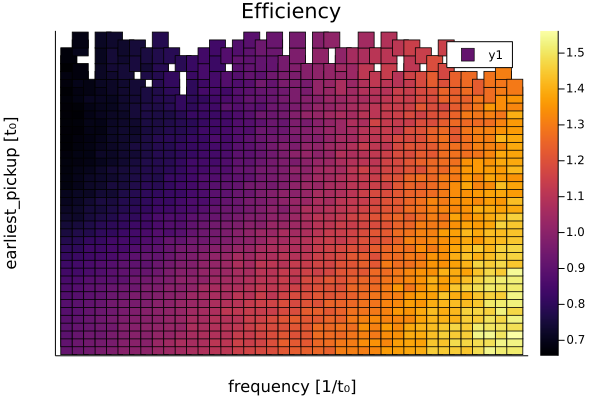

┌ Warning: No strict ticks found
└ @ PlotUtils /home/rhaag/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294
┌ Warning: No strict ticks found
└ @ PlotUtils /home/rhaag/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294


In [6]:
name = "Efficiency"
data =  df.requested_distance ./df.driven_distance
p = scatter(xs, ys,
            marker_z= data, #attr(cmin=minimum(data), cmax=maximum(data), color=data, colorscale="Bluered")
            marker = (:rect, 8),
            xlabel="$xname [1/t₀]", ylabel="$yname [t₀]",
        title="$name",
    xticks= (5:7:50, ["$i" for i in 5:7:50]))
    xaxis!(:log)
    yaxis!(:log)
    display(p)

In [6]:
for name in ks
    data = df[!, name]
    #println("$(maximum(df[!, xname])), $(maximum(df[!, yname])), $(size(df[!, name]))")
    # p = scatter(xs, ys,
    #        marker_z= data, #attr(cmin=minimum(data), cmax=maximum(data), color=data, colorscale="Bluered")
    #        markershape = :rect,
    #        xlabel="$xname [1/t₀]", ylabel="$yname [t₀]",
    # title="$name"      )
    
    #display(p)
    
    data = reshape(data, (60, 40))
   
    map = heatmap(
    unique(xs), unique(ys), data,
    c=cgrad([:black, :white]),
    xlabel="$xname [1/t₀]", ylabel="$yname [t₀]",
    title="$name")
    display(map)
    #savefig(map, "results/$name.png")
end

#TODO Waiting Time
#TODO 

LoadError: UndefVarError: ks not defined

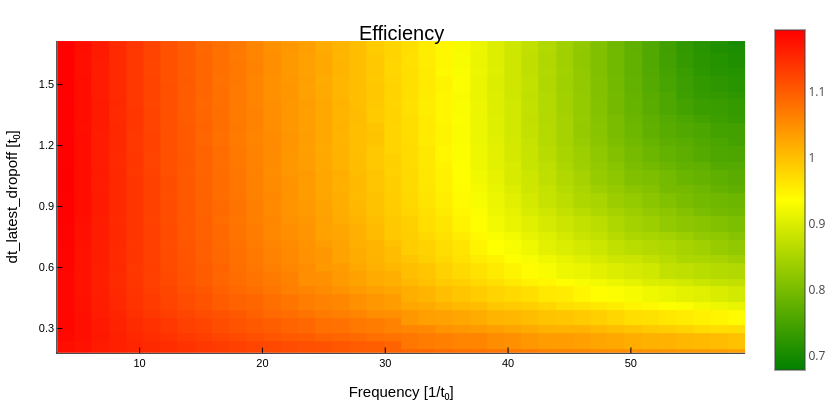

(60, 40)


In [5]:
name = "Efficiency"
data =  df.driven_distance./df.requested_distance

data = reshape(data, (60, 40))
    println(size(data))
    
    map = heatmap(
    xs, ys, data,
    c=cgrad([:green,:yellow, :red]),
    xlabel="Frequency [1/t₀]", ylabel="$yname [t₀]",
    title="$name")
    display(map)
    #savefig(map, "results/$name.png")
#savefig(map, "results/$name.png")


In [ ]:
if true &&